In [1]:
from classy import Class
import numpy as np
LambdaCDM = Class()
ln_10_10_As = 3.044
A_s = np.exp(ln_10_10_As) / 1e10
# A_s = 3.044e-10

# 1807.06209 table 2, TT,TE,EE+lowE+lensing 
LambdaCDM.set({'omega_b':0.02237,
               'omega_cdm':0.1200,
               '100theta_s':1.04092,
               'A_s':A_s,
               'n_s':0.9649,
               'tau_reio':0.0544,
               'N_mscf':0,
               "do_shooting": "yes",
               }
               )

LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes'})

params_EDE = {

    "output": "tCl,lCl,mPk",
    # LCDM parameters
    "omega_b": 0.02251,
    "omega_cdm": 0.1320,
    "H0": 72.81,
    "tau_reio": 0.068,
    "A_s": 2.191e-9,
    "n_s": 0.9860,

    # neutrinos
    "N_ur": 2.0328,
    "N_ncdm": 1,
    "deg_ncdm": 1,
    "m_ncdm": 0.06,
    "T_ncdm": 0.71611,

    # EDE parameters
    "scf_potential": "axion",
    "n_axion": 2.6,
    "f_axion": 0.1,
    "m_axion": 1e4,
    "scf_parameters": '2.72,0',

    # extra EDE parameters
    "scf_evolve_as_fluid": "no",
    "scf_evolve_like_axionCAMB": "no",
    "do_shooting": "no",
    "do_shooting_scf": "no",
    "attractor_ic_scf": "no",

    # verbosity
    "input_verbose": 1,
    "background_verbose": 1,
    "thermodynamics_verbose": 1,
    "perturbations_verbose": 1,
    "transfer_verbose": 1,
    "primordial_verbose": 1,
    #"spectra_verbose": 1,
    # "nonlinear_verbose": 1,
    "lensing_verbose": 1,
    "output_verbose": 1,
    "l_max_scalars":5000,
}

EDE1 = Class()
EDE1.set(params_EDE)
LambdaCDM.compute()

Saved lcdm_cl.pdf to /Users/bellamarco01/uni/1_master_thesis/thesis/plots


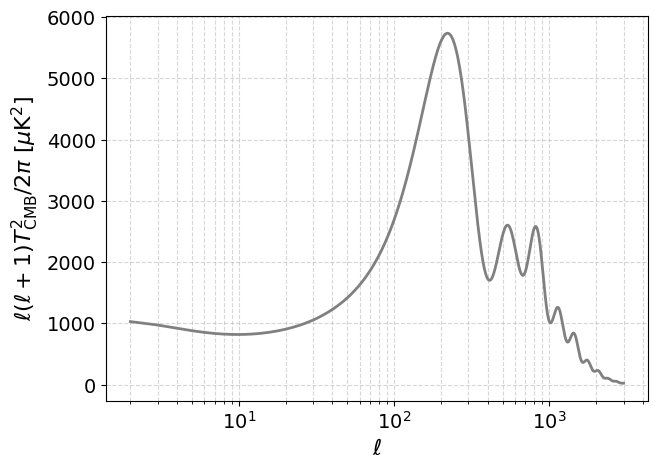

In [13]:
import matplotlib.pyplot as plt
import numpy as np


cl_tot = LambdaCDM.raw_cl(3000)
from plotting.plotting import new_fig
import numpy as np

# Create figure
fig, ax = new_fig()
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1)  T^2_\text{CMB} / 2 \pi $ [$\mu$K$^2$]")

ell = cl_tot['ell']
T_cmb = 2.725
T_uK = T_cmb*1e6
D_ell = ell*(ell+1)/(2*np.pi) * cl_tot['tt'] * T_uK**2
ax.set_xscale('log')

# Plot single line — grey automatically
ax.plot_single(ell[2:], D_ell[2:], label=r"$C_\ell^{TT}$ [$\mu$K$^2$]")

# Add legend
#ax.legend(frameon=False, fontsize=14)

# Save figure
fig.save("lcdm_cl")
